<a href="https://colab.research.google.com/github/Kush-Singh-26/ML-learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

data = housing['data']
x_input = data[:, [0,2]]
y_target = housing['target']



.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

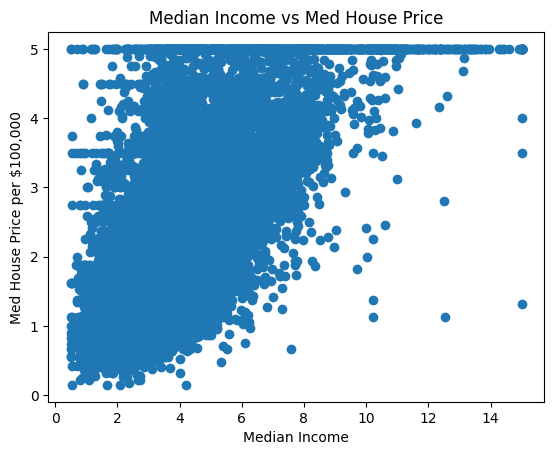

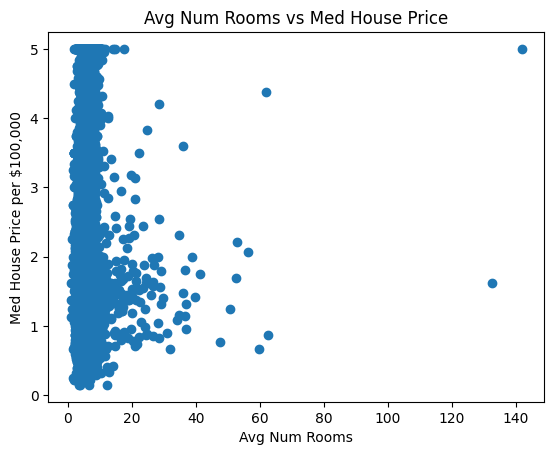

In [ ]:
plt.title('Median Income vs Med House Price')
plt.scatter(x_input[:, 0], y_target)
plt.xlabel('Median Income')
plt.ylabel('Med House Price per $100,000')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(x_input[:, 1], y_target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price per $100,000')
plt.show()

**Cost function in non vectorized form.**

In [ ]:
def cost(w1, w2, b, X, t):
    costs = 0
    for i in range(len(t)):
        y_i = w1 * X[i, 0] + w2 * X[i, 1] + b
        t_i = t[i]
        costs += 0.5 * (y_i - t_i) ** 2
    return costs / len(t)

print(cost(3, 5, 20, x_input, y_target))

**Cost in vectorized form**

In [ ]:
def cost_vectorized(w1, w2, b, X, t):
    N = len(y_target)
    w = np.array([w1, w2])
    y = np.dot(X, w) + b * np.ones(N)
    return np.sum((y - t)**2) / (2.0 * N)

print(cost_vectorized(3, 5, 20, x_input, y_target))

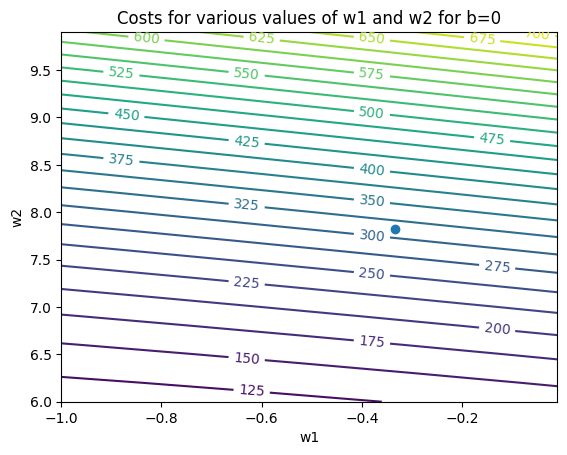

In [ ]:
w1s = np.arange(-1.0, 0.0, 0.01)
w2s = np.arange(6.0, 10.0, 0.1)
z_cost = []
for w2 in w2s:
    z_cost.append([cost_vectorized(w1, w2, -22.89831573, x_input, y_target) for w1 in w1s])
z_cost = np.array(z_cost)
np.shape(z_cost)
W1, W2 = np.meshgrid(w1s, w2s)
CS = plt.contour(W1, W2, z_cost, 25)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Costs for various values of w1 and w2 for b=0')
plt.xlabel("w1")
plt.ylabel("w2")
plt.plot([-0.33471389], [7.82205511], 'o') # this will be the minima that we'll find later
plt.show()

In [ ]:
x_in = np.concatenate([x_input, np.ones([np.shape(x_input)[0], 1])], axis=1)
x_in

array([[8.3252    , 6.98412698, 1.        ],
       [8.3014    , 6.23813708, 1.        ],
       [7.2574    , 8.28813559, 1.        ],
       ...,
       [1.7       , 5.20554273, 1.        ],
       [1.8672    , 5.32951289, 1.        ],
       [2.3886    , 5.25471698, 1.        ]])

In [ ]:
def solve_exactly(X, t):
    '''
    Solve linear regression exactly. (fully vectorized)

    Given `X` - NxD matrix of inputs
          `t` - target outputs
    Returns the optimal weights as a D-dimensional vector
    '''
    # TODO: write this!
    N, D = np.shape(X)
    A = np.matmul(X.T, X)
    c = np.dot(X.T, t)
    return np.matmul(np.linalg.inv(A), c)

w_opt = solve_exactly(x_in, y_target)
print(w_opt)
np.linalg.lstsq(x_in, y_target)

[ 0.43416302 -0.03811061  0.59495847]


<ipython-input-20-764abf8317d4>:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(x_in, y_target)


(array([ 0.43416302, -0.03811061,  0.59495847]),
 array([14307.45411576]),
 3,
 array([1036.62512329,  248.69163492,   51.09320478]))

**Using gradient descent**

In [ ]:
def gradfn(weights, X, t):
    N, D = np.shape(X)
    y_pred = np.matmul(X, weights)
    error = y_pred - t
    return np.matmul(np.transpose(x_in), error) / float(N)

def solve_via_gradient_descent(X, t, print_every=5000,
                               niter=100000, alpha=0.005):

    N, D = np.shape(X)

    w = np.zeros([D])
    for k in range(niter):
        dw = gradfn(w, X, t)
        w = w - alpha*dw
        if k % print_every == 0:
            print('Weight after %d iteration: %s' % (k, str(w)))
    return w
solve_via_gradient_descent( X=x_in, t=y_target)

Weight after 0 iteration: [0.04757555 0.05832003 0.01034279]
Weight after 5000 iteration: [ 0.43649917 -0.03607343  0.57194552]
Weight after 10000 iteration: [ 0.43426184 -0.03802444  0.59398502]
Weight after 15000 iteration: [ 0.4341672  -0.03810697  0.5949173 ]
Weight after 20000 iteration: [ 0.4341632  -0.03811046  0.59495673]
Weight after 25000 iteration: [ 0.43416303 -0.03811061  0.5949584 ]
Weight after 30000 iteration: [ 0.43416302 -0.03811061  0.59495847]
Weight after 35000 iteration: [ 0.43416302 -0.03811061  0.59495847]
Weight after 40000 iteration: [ 0.43416302 -0.03811061  0.59495847]
Weight after 45000 iteration: [ 0.43416302 -0.03811061  0.59495847]
Weight after 50000 iteration: [ 0.43416302 -0.03811061  0.59495847]
Weight after 55000 iteration: [ 0.43416302 -0.03811061  0.59495847]
Weight after 60000 iteration: [ 0.43416302 -0.03811061  0.59495847]
Weight after 65000 iteration: [ 0.43416302 -0.03811061  0.59495847]
Weight after 70000 iteration: [ 0.43416302 -0.03811061  

array([ 0.43416302, -0.03811061,  0.59495847])

In [ ]:
np.linalg.lstsq(x_in, y_target)

<ipython-input-24-3e18da8aab63>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(x_in, y_target)


(array([ 0.43416302, -0.03811061,  0.59495847]),
 array([14307.45411576]),
 3,
 array([1036.62512329,  248.69163492,   51.09320478]))

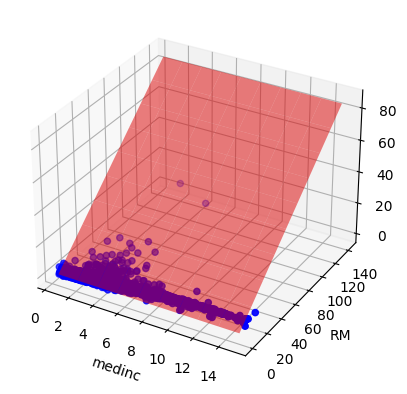

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coefficients from the linear regression model
intercept = 0.43416302 # Replace with your intercept value
coef_medinc = -0.03811061  # Replace with your INDUS coefficient
coef_rm = 0.59495847  # Replace with your RM coefficient

# Sample data (replace with your actual data)
medinc = x_input[:, 0]
RM = x_input[:, 1]
prices = y_target

# Create a grid of values
medinc_range = np.linspace(min(medinc), max(medinc), 10)
rm_range = np.linspace(min(RM), max(RM), 10)
medinc_grid, rm_grid = np.meshgrid(medinc_range, rm_range)
price_grid = intercept + coef_medinc * medinc_grid + coef_rm * rm_grid

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(medinc, RM, prices, color='blue', label='Data points')
ax.plot_surface(medinc_grid, rm_grid, price_grid, color='red', alpha=0.5, label='Regression plane')
ax.set_xlabel('medinc')
ax.set_ylabel('RM')
ax.set_zlabel('Price')
plt.show()
